## Regression

In [ ]:
#regression 
## supervised -> training phase
### training phase -> given (x, y), the machine learns the h function to map x to y
### sample 1 => x1=gold, x2=egg, y=stock price
### x1=10, x2=20, y=51
### 1 * x1 + 2 * x2 = yhat = 50   (loss = y - yhat = 51 - 50)
### h function is basically a = 1, b = 2, ax1 + bx2 + c = y  --> h

### linear regression --> linear function of h

In [2]:
#regression
## y is continous value
## what if y is not strictly a continous value -> let's say integers
## it is still fine, but a fined-grained model will not be possible

In [3]:
#h function

#if I have one feature
## h(x) = ax + b
## y = ax + b
## a = coefficient, intercept, theta, beta
## b = bias, error, noise

#if I have two features
## h(x1, x2) = ax + bx2 + c
## y = ax + bx2 + c
## a, b = coefficient, intercept, theta, beta
## c = bias, error, noise

#if I have three features
## h(x1, x2, x3) = ax + bx2 + cx3 + d
## y = ax + bx2 + cx3 + d

In [4]:
### Linear regression example

import numpy as np

### Generate a function y = ax + b, where a = 2, b = -5
### I want 500 points of this relationship
### My x to be in range between 0 to 10

rng = np.random.RandomState(1)

x = 10 * rng.rand(500)
y = 2 * x - 5 + 20 * rng.rand(500)

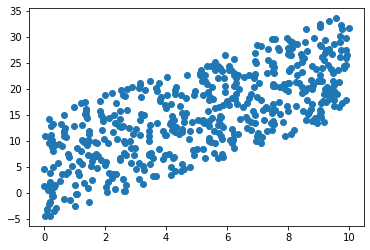

In [5]:
#plot them in a scatter plot

import matplotlib.pyplot as plt
#plt.scatter/plot x should shape of (something, ) | (something, 1)
#y should be shape of (something, ) | (something, 1)
plt.scatter(x, y)

In [6]:
#ready to use scikit learn linear regression API to fit the model -> training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.model_selection as model_selection

#one key important thing to know
#To best of my best knowledge, but all sklearn API expect your X
#to be shape of (number of samples, number of features)
#if your model is regression, then the y is of shape
#(number of samples, ) or (number of samples, 1)
#if your model is binary classification, then the y is of shape
#(number of samples, ), or (number of samples, 1)
#[0, 1, 0, 0, 1]
#if your model is a multiclass classification, then the Y is of shape
#(number of samples, number of classes)
# sample 1 = [0.21, 0.11, 0.11, 0.32, 0.25]
# why NOT [4, 2, 1, 2, 4]

#x -> X
#current shape of x
#(500, ) -> (500, 1)
X = x[:, np.newaxis]

#current shape of y
#(500, )
#our y is ok, no need to reshape

#how do I know that the model I just train is good

Text(0.1, 24, '$adjusted r^2$ = 0.52')

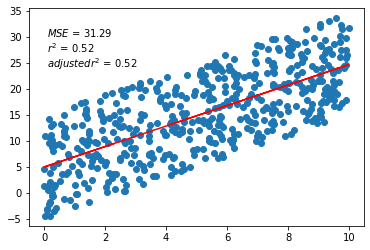

In [7]:
#the wrong way
model = LinearRegression(fit_intercept=True)

#any model has a function .fit()
#.fit(X, y)
#this X, y should follow the shape above specified

#this model will now learn the function h
#nothing is return here
#the learn functino is incorporated inside the model object
model.fit(X, y)

#try to predict
#.predict will use the learned function h to predict y given X
yhat = model.predict(X)

#plot for my actual data
plt.scatter(X, y)

#this is my best fitted line
plt.plot(X, yhat, color='red')

#calculate accuracy/loss
#loss = mean_squared error
#mean_squared_error(y, yhat)  -> y and yhat should be of shape
#\(sigma_i=1^m (yi - yhat)^2)/m
plt.text(0.1, 30, f"$MSE$ = {mean_squared_error(y, yhat):.2f}")

#another common measure for loss in regression
#is r2
plt.text(0.1, 27, f"$r^2$ = {r2_score(y, yhat):.2f}")

#another measure is called adjusted r2
n = X.shape[0] #number of samples  (m)
p = X.shape[1] #number of features (n)
adjusted_rsqrt = 1 - (1-r2_score(y, yhat)) * (n-1)/(n-p-1)
plt.text(0.1, 24, f"$adjusted r^2$ = {adjusted_rsqrt:.2f}")

Text(0.1, 24, '$adjusted r^2$ = 0.50')

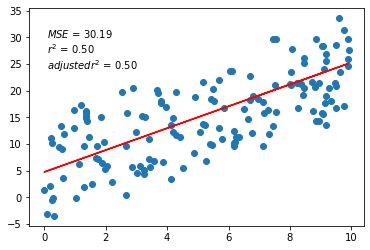

In [8]:
#the correct way
model = LinearRegression(fit_intercept=True)

#any model has a function .fit()
#.fit(X, y)
#this X, y should follow the shape above specified

#measure the accuracy based on unseen data
#means -> split data into training data, testing data
#means that -> 80/20; 70/30
#but if our data is really huge, 90/10

#X_train -> 70% data   350/500
#X_test -> 30% data
#y_train should match X_train
#y_test should match y_test

# X_train = X[:350, :]
# y_train = y[:350]
# X_test = X[350:, :]
# y_test = y[350:]

#return a tuple of X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3, random_state=99)

#this model will now learn the function h
#nothing is return here
#the learn functino is incorporated inside the model object
model.fit(X_train, y_train)

#try to predict
#.predict will use the learned function h to predict y given X
yhat = model.predict(X_test)

#plot for my actual data
plt.scatter(X_test, y_test)

#this is my best fitted line
plt.plot(X_test, yhat, color='red')

#calculate accuracy/loss
#loss = mean_squared error
#mean_squared_error(y, yhat)  -> y and yhat should be of shape
#\(sigma_i=1^m (yi - yhat)^2)/m
plt.text(0.1, 30, f"$MSE$ = {mean_squared_error(y_test, yhat):.2f}")

#another common measure for loss in regression
#is r2
plt.text(0.1, 27, f"$r^2$ = {r2_score(y_test, yhat):.2f}")

#another measure is called adjusted r2
n = X.shape[0] #number of samples  (m)
p = X.shape[1] #number of features (n)
adjusted_rsqrt = 1 - (1-r2_score(y_test, yhat)) * (n-1)/(n-p-1)
plt.text(0.1, 24, f"$adjusted r^2$ = {adjusted_rsqrt:.2f}")

In [9]:
#training data -> fit()   70
#validation data -> for finetuning your model hyperparameters 20
#testing data -> checking accuracy  10

In [10]:
#Polynomial Regression
# y = ax + b

#feature engineering
## create some new features that could better model the relationship between x and y
# if I choose degree = 3
# y = ax^3 + bx^2 + cx + d

In [11]:
x = np.array([1, 2, 3, 4, 5])
X = x.reshape(-1, 1)

print("====X====")
print(X)

from sklearn.preprocessing import PolynomialFeatures
poly_X = PolynomialFeatures(degree = 3).fit_transform(X)
print("====X polynomial features of deg3====")
print(poly_X)


#how do we know which deg we need to use
#visualization
#cross validation -> trial and errors
#and find the best deg with miniminum loss

====X====
[[1]
 [2]
 [3]
 [4]
 [5]]
====X polynomial features of deg3====
[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]


In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()

#just get one feature -> 12th feature, #% lower status of the population
X = boston.data[:, 12][:, np.newaxis]
y = boston.target

Text(25, 32, '$adjusted r^2$ = 0.50')

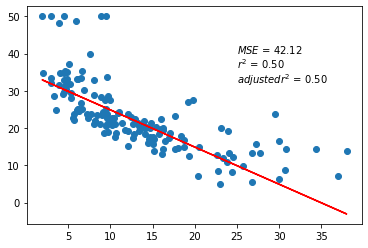

In [13]:
#please take 5 minutes to do a linear regression model
#let me know the mse, and also the r2
#please also plot the actual data, and also the fitted line

#return a tuple of X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3, random_state=99)

#this model will now learn the function h
#nothing is return here
#the learn functino is incorporated inside the model object
model.fit(X_train, y_train)

#try to predict
#.predict will use the learned function h to predict y given X
yhat = model.predict(X_test)

#plot for my actual data
plt.scatter(X_test, y_test)

#this is my best fitted line
plt.plot(X_test, yhat, color='red')

#calculate accuracy/loss
#loss = mean_squared error
#mean_squared_error(y, yhat)  -> y and yhat should be of shape
#\(sigma_i=1^m (yi - yhat)^2)/m
plt.text(25, 40, f"$MSE$ = {mean_squared_error(y_test, yhat):.2f}")

#another common measure for loss in regression
#is r2
plt.text(25, 36, f"$r^2$ = {r2_score(y_test, yhat):.2f}")

#another measure is called adjusted r2
n = X.shape[0] #number of samples  (m)
p = X.shape[1] #number of features (n)
adjusted_rsqrt = 1 - (1-r2_score(y_test, yhat)) * (n-1)/(n-p-1)
plt.text(25, 32, f"$adjusted r^2$ = {adjusted_rsqrt:.2f}")
#mse = ? 38.09
#r2 = ?  0.48

======DEG 1======
MSE:  42.124704
r^2:  0.502466
adjusted r^2:  0.501479
Coeff:  [ 0.         -0.99802125]
======DEG 3======
MSE:  36.181854
r^2:  0.572657
adjusted r^2:  0.571809
Coeff:  [ 0.00000000e+00 -4.69678383e+00  2.04808005e-01 -3.09536685e-03]
======DEG 5======
MSE:  38.181042
r^2:  0.549045
adjusted r^2:  0.548150
Coeff:  [ 0.00000000e+00 -1.62795495e+01  1.83993701e+00 -1.01714563e-01
  2.62943436e-03 -2.54441322e-05]
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])


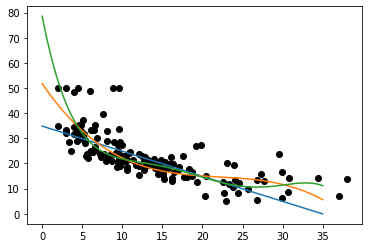

In [14]:
##please take 5 minutes to 
#1. feature engineering using polynomial features deg = 1, 3, 5
#    and set them as your new X
#2. fit() with linearRegression()
#3. mse =? #r2 =?

for ix, deg in enumerate([1, 3, 5]):
    #using pipeline eliminate the need to create new X for every loop
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())

    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    
    #plot some nice graph
    X_plot = np.linspace(0, 35, 100)[:, np.newaxis]
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot)
#     plt.plot(X_test, yhat)
    
    
    print(f"======DEG {deg}======")
    
    #validation score
    print("MSE: ", f"{mean_squared_error(y_test, yhat):2f}")
    print("r^2: ", f"{r2_score(y_test, yhat):2f}")
    
    n, p = X.shape[0], X.shape[1]
    adjusted_rsqrt = 1 - (1-r2_score(y_test, yhat)) * (n-1)/(n-p-1)
    print("adjusted r^2: ", f"{adjusted_rsqrt:2f}")
    
    print("Coeff: ", model.named_steps['linearregression'].coef_)

plt.scatter(X_test, y_test, color='black')

print(model)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])


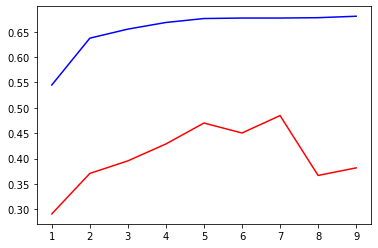

In [15]:
###Validation curve

#so which deg will have a better training score vs. validation score
#--> a model can have high training score but low validation score -> overfitting

#Overfitting = high training score = to
#.           = low validation score = vo
#.           = to - vo = huge

#Underfitting = low training score = tu
#.           = low validation score = vu
#.           = tu - vu = smaller than to - vo

#--> a model can have low training score, but low validation score -> underfitting
#--> a model that has fairly closest training and validation score -> testing
#.    on unseen data is just as good as the training phase

from sklearn.model_selection import validation_curve

degree = np.arange(1, 10)
#estimator
model = make_pipeline(PolynomialFeatures(), LinearRegression())

print(model)

#(estimator, X, y)
# cv number of cross validation
train_score, val_score = validation_curve(model, X, y, param_name="polynomialfeatures__degree", param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, axis=1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, axis=1), color='red', label='training score')



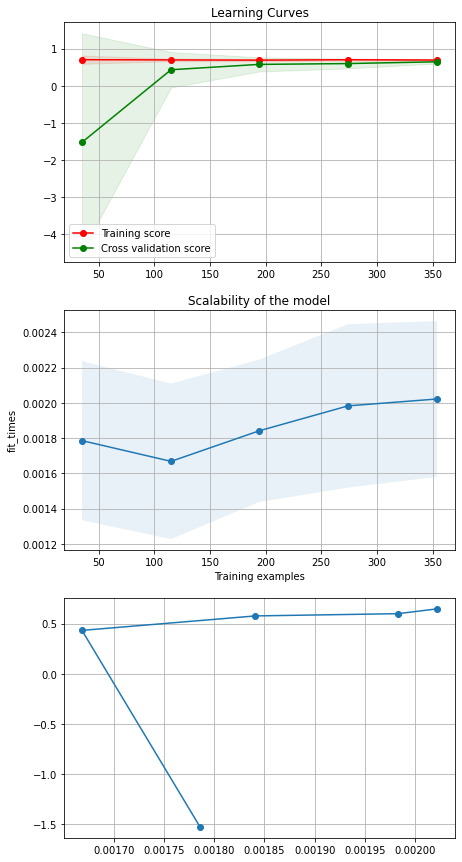

In [31]:
#learning curve

#A model will generally overfit a small dataset
#A model will generally underfit a huge dataset
#accuracy depends on the sample size

#plot accuracy as a function of sample size
#adding more data will not improve the validation score

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(model, X, y):
    cv = ShuffleSplit(n_splits = 10, test_size = 0.3,
                     random_state=42)
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(model, X, y, cv=cv, n_jobs=-1, return_times=True)
    
    
    #calculate some mean
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    _, ax = plt.subplots(3, 1, figsize=(7, 15))
    
    #plot learning curve
    ax[0].grid()
    ax[0].set_title("Learning Curves")
    ax[0].plot(train_sizes, train_scores_mean, 'o-', color='r',
              label="Training score")
    ax[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color='r')
    ax[0].plot(train_sizes, test_scores_mean, 'o-', color='g',
              label="Cross validation score")
    ax[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color='g')
    ax[0].legend(loc='best')
    
    #n_samples vs fit_times
    ax[1].grid()
    ax[1].set_title("Scalability of the model")
    ax[1].plot(train_sizes, fit_times_mean, 'o-')
    ax[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                      fit_times_mean + fit_times_std, alpha=0.1)
    ax[1].set_xlabel("Training examples")
    ax[1].set_ylabel("fit_times")
    
    #fit vs score
    #whether the more time it fits, the better score will it get?
    ax[2].grid()
    ax[2].plot(fit_times_mean, test_scores_mean, 'o-')

model = make_pipeline(PolynomialFeatures(5), LinearRegression())
plot_learning_curve(model, X, y)

In [32]:
#Gridsearch

#gridsearch is basically a simple way to loop through
#all the possible parameters, and compare different models
#arising from these parameters
#You should always use gridsearch instead of for loops

Best params: {'linearregression__normalize': True, 'polynomialfeatures__degree': 8}


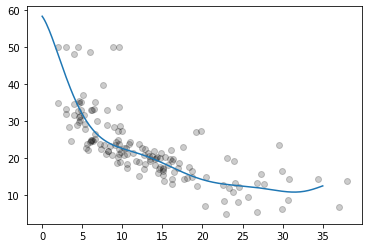

In [47]:
from sklearn.model_selection import GridSearchCV

#notice I did not specify the degree of PolynomialFeatures
model = make_pipeline(PolynomialFeatures(), LinearRegression())

#specify the parameters range in dictionary, so that GridSearchCV
#can eat it
#please try all possible degree from 1 to 10
#please try True and False, for normalize parameters
#total = 20 models
param_grid = {'polynomialfeatures__degree': np.arange(1, 10),
             'linearregression__normalize': [True, False]}

#main three arguments (model, param_grid, cv)
#if you simply say cv=int, it will use the default cv algorithm
#but if you say cv = ShuffleSplit, e.g., then it will become that
#what does it return?
#it return a special kind of estimator, with the same function fit()
grid = GridSearchCV(model, param_grid, cv=7)

#grid.fit()
#fit() will try all possible params defined in param_grid
#and record the results
grid.fit(X_train, y_train)

#print the best params
#YOU MUST ALWAYS USE GRIDSEARCH (of course, you cannot use GridSearch
#in NeuralNetworks, but certainly possible in sckit-learn)
print("Best params:", grid.best_params_)

#best params?
#best model?
#bye bye -> manually construct model
model = grid.best_estimator_

model.fit(X, y)

yhat = model.predict(X_test)

#scatter plot of actual data
plt.scatter(X_test, y_test, color='k', alpha=0.2)

#plot the best fit line
#we cannot use y_hat and X_test to plot a line
#because all the points are not really continuous
#create our manual X points
#and use model.predict to actually get its corresponding y
X_plot = np.linspace(0, 35, 200)[:, np.newaxis]
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot)

In [48]:
from sklearn.linear_model import Lasso
#try to do a lasso regression
#perform grid search
#over polynomial features -> np.arange(1, 5)
#over lasso alpha (lambda) -> 0.1, 0.01, 0.001, 0.0001
#print out the accuracy

from sklearn.linear_model import Ridge
#try to do a ridge regression
#over polynomial features -> np.arange(1, 5)
#over ridge alpha (lambda) -> 0.1, 0.01, 0.001, 0.0001
#print out the accuracy

from sklearn.linear_model import ElasticNet
#try to do a elastic net regression
#over polynomial features -> np.arange(1, 5)
#over elasticnet alpha (lambda) -> 0.1, 0.01, 0.001, 0.0001
#over elasticnet l1 ratio -> np.linspace(0, 1, 3)
#print out the accuracy

help(grid)




Help on GridSearchCV in module sklearn.model_selection._search object:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either 